In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

(50, 100)

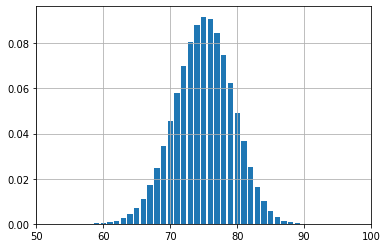

In [2]:
#pylab inline
F_H0 = stats.binom(100, 0.75)
x = np.linspace(0, 100, 101)
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.grid(True)
plt.xlim((50, 100))

In [64]:
stats.binom_test(67, 100, 0.75)

0.08222258891386608

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

pines.txt
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [4]:
with open('pines.txt') as infile, open('pines.csv', 'w') as outfile:
    for line in infile:
        outfile.write(','.join(line.strip().split()) + '\n')

In [33]:
import pandas as pd
data = pd.read_csv('pines.csv')
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [34]:
pines = stats.binned_statistic_2d(data['sn'], data['we'], data['sn'], 'count', bins = 5)
pines.statistic

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

In [35]:
data.shape[0]/25 # МО кол-ва сосен в квадрате

23.36

In [57]:
np.array([data.shape[0]/25]*25).reshape(25,)

array([23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36,
       23.36, 23.36, 23.36, 23.36, 23.36, 23.36, 23.36])

In [50]:
pines.statistic.reshape(25, )

array([18., 26., 29., 25., 20., 14., 12., 22., 34., 25., 12., 24., 15.,
       50., 37.,  8., 19., 31., 50.,  7.,  7.,  8., 37., 27., 27.])

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [63]:
stats.chisquare(pines.statistic.reshape(25, ) , np.array([data.shape[0]/25]*25).reshape(25,) , ddof = 0, axis = None)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с 25-1=2425−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K-1K−1, где KK — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

pvalue=2.574669774967279e-20